In [5]:

from sklearn.preprocessing import LabelEncoder

df['Gender']=LabelEncoder().fit_transform(df['Gender'])
# Female = 0 , Male = 1 

Y=df.iloc[:,0:].values



In [6]:

## Decomposition Of features

from sklearn.decomposition import PCA

pca=PCA(n_components=2)
df_pca=pca.fit_transform(Y)

df['PCA1']=df_pca[:,0]
df['PCA2']=df_pca[:,1]


df

,Gender,Age,Annual Income (k$),Spending Score (1-100),PCA1,PCA2
CustomerID,,,,,,
1,1,19,15,39,-31.869945,-33.001252
2,1,21,15,81,0.764494,-56.842901
3,0,20,16,6,-57.408276,-13.124961
4,0,23,16,77,-2.168543,-53.478590
5,0,31,17,40,-32.174085,-30.388412
...,...,...,...,...,...,...
196,0,35,120,79,58.352515,31.017542
197,0,45,126,28,19.908001,66.446108
198,1,32,126,74,58.520804,38.346039


In [7]:
from sklearn.cluster import KMeans

In [8]:
kmean=KMeans()

## Elbow Method

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

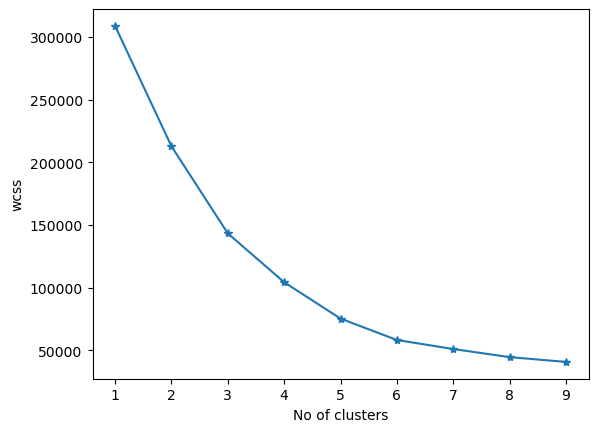

In [9]:
wcss=[]
for i in range(1,10):
    kmean=KMeans(n_clusters=i,random_state=42)
    kmean.fit(Y)
    wcss.append(kmean.inertia_)
plt.plot(range(1,10),wcss,marker='*')
plt.xlabel('No of clusters')
plt.ylabel('wcss')
plt.show()


## Model Fitting


In [10]:

from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=4)
kmeans.fit(df_pca)
df['Cluster']=kmeans.predict(df_pca)

df

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Gender,Age,Annual Income (k$),Spending Score (1-100),PCA1,PCA2,Cluster
CustomerID,,,,,,,
1,1,19,15,39,-31.869945,-33.001252,3
2,1,21,15,81,0.764494,-56.842901,0
3,0,20,16,6,-57.408276,-13.124961,3
4,0,23,16,77,-2.168543,-53.478590,0
5,0,31,17,40,-32.174085,-30.388412,3
...,...,...,...,...,...,...,...
196,0,35,120,79,58.352515,31.017542,2
197,0,45,126,28,19.908001,66.446108,1
198,1,32,126,74,58.520804,38.346039,2
